# Project.1-Logistic Regression(B)

In [36]:
import pandas as pd
import numpy as np


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [60]:
df=pd.read_csv('resale_discrete.csv')


In [61]:
df.columns

Index(['Unnamed: 0', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price'],
      dtype='object')

### Replacing Medium to High

In [62]:
df['resale_price']=df['resale_price'].replace("Medium", "High")

Only want to get 3 features

In [63]:
df=df[['floor_area_sqm', 'resale_price',  'street_name', 'resale_price']]


Rename the *resale_price* feature to *class_name* for visualisation purposes

In [64]:
df.columns=['floor_area_sqm', 'resale_price', 'street_name', 'class_name']

In [20]:
y=df['resale_price']
X=df[['floor_area_sqm']]


In [21]:
y=y.map({'Low':0, 'High':1}) 

In [22]:
class_names=['Low', 'High']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.fit(X_train, y_train).predict(X_test)

In [25]:
scores = cross_val_score(logreg, X, y, cv=5)
scores    

array([ 0.85286783,  0.82294264,  0.8475    ,  0.8320802 ,  0.85213033])

In [26]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.02)


In [27]:
metrics.accuracy_score(y_test, y_pred) 

0.82599999999999996

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 90,  59],
       [ 28, 323]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

        Low       0.76      0.60      0.67       149
       High       0.85      0.92      0.88       351

avg / total       0.82      0.83      0.82       500



In [30]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,90,59,149
1,28,323,351
All,118,382,500


Confusion matrix, without normalization
[[ 90  59]
 [ 28 323]]


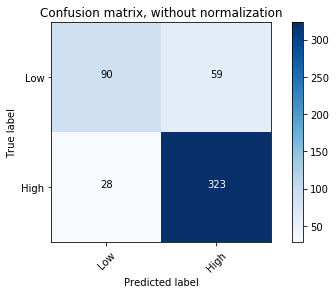

In [31]:

import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()